# Regression

Example project for Keras-based regression on a realistic data set.

Adaption of the notebook created by Jose Marcial Portilla (https://www.pieriandata.com)

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

# Exploratory Data Analysis

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [51]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.describe().transpose()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

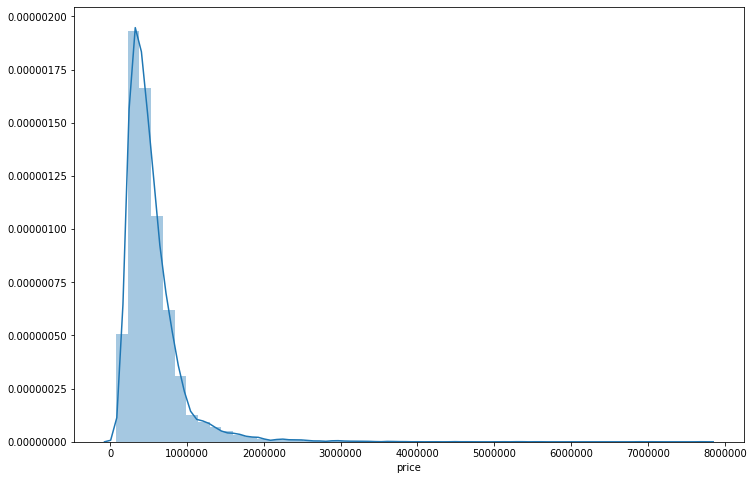

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

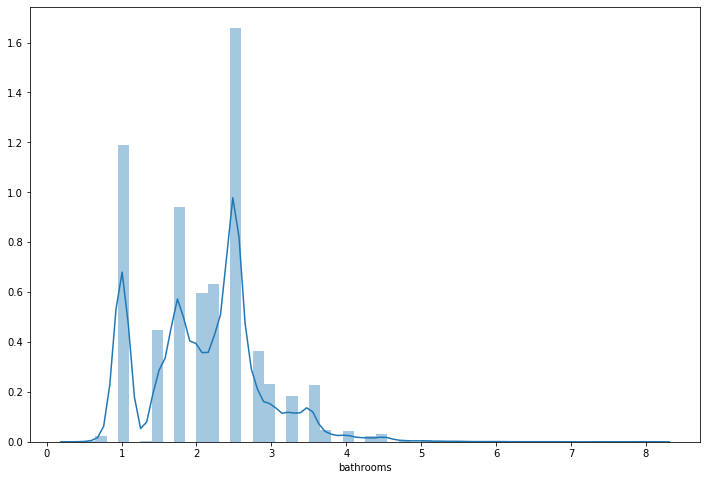

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(df['bathrooms'])

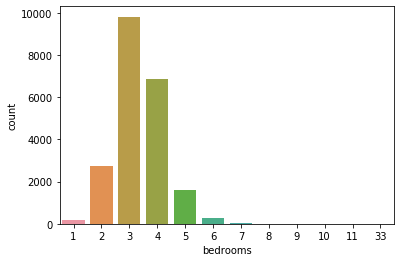

In [6]:
sns.countplot(df['bedrooms'])

In [36]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

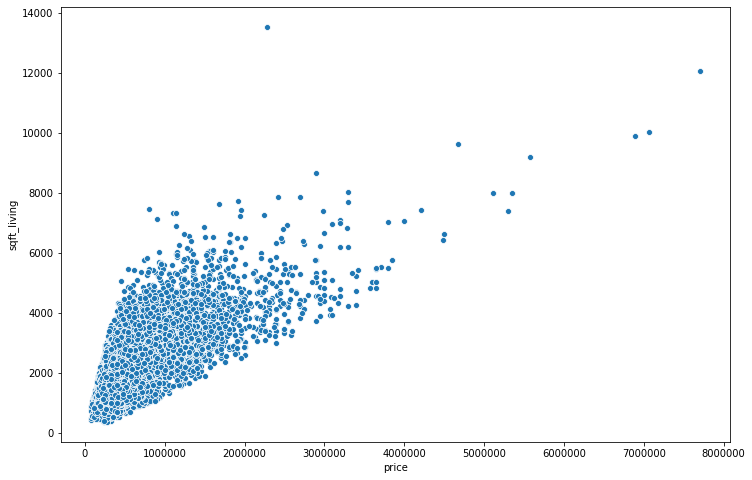

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

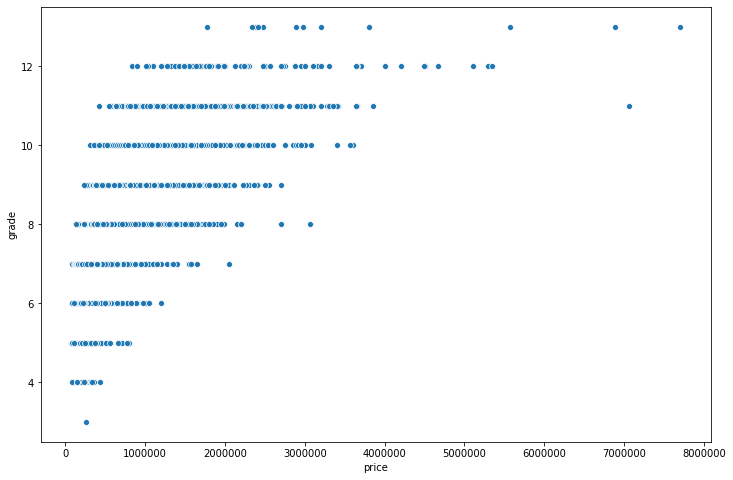

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='grade',data=df)

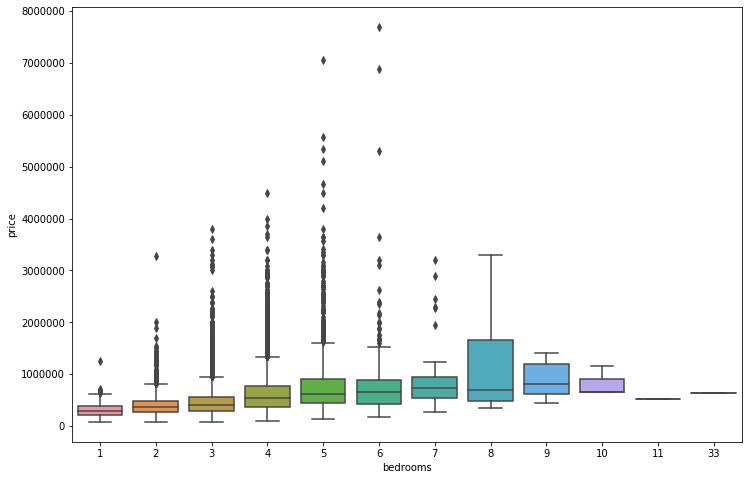

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

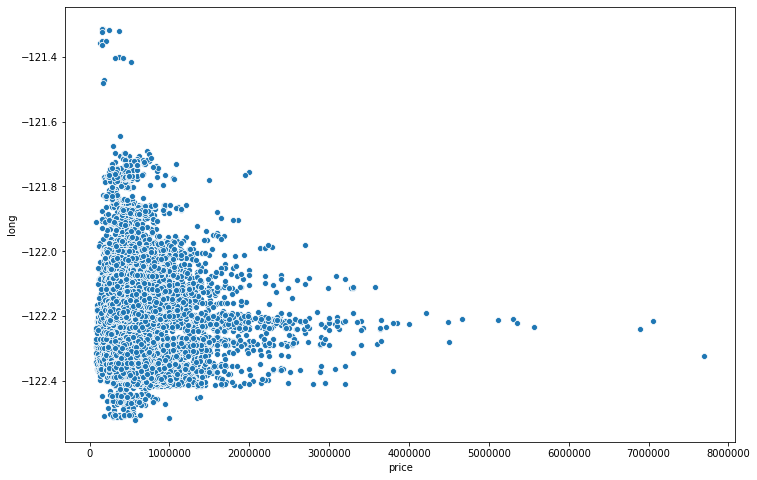

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

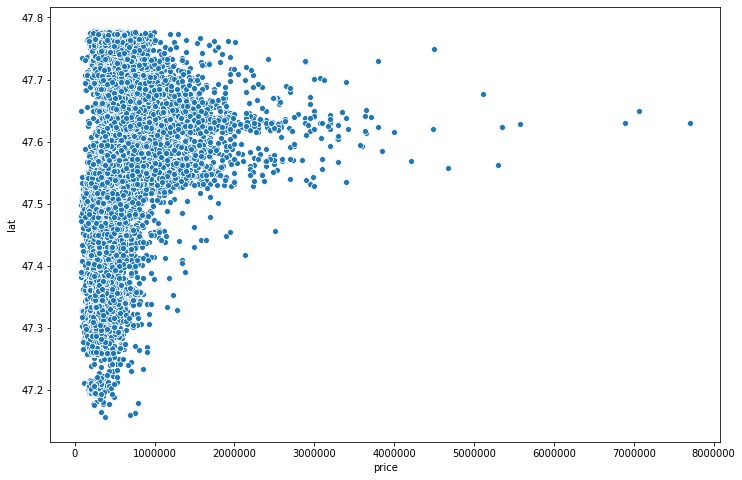

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

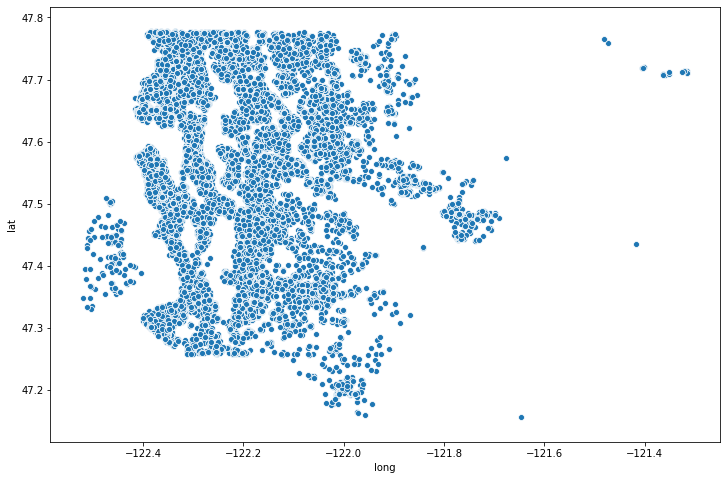

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df)

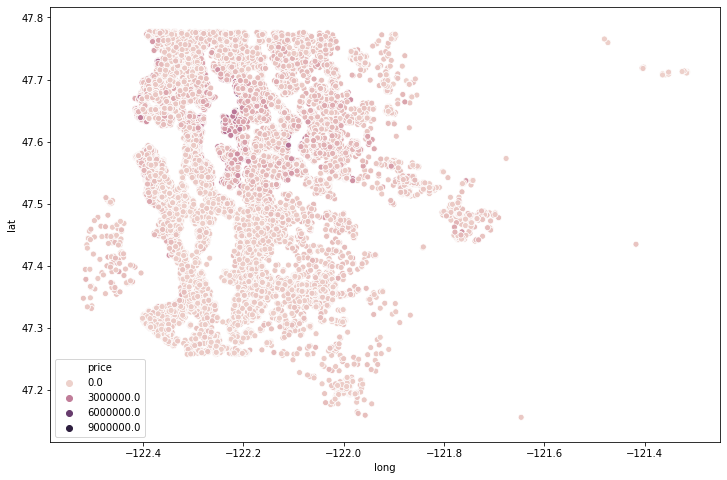

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

The color distribution in the figure above is not so clear, mainly because of the long tail. To get a better veiw, let us remove the outliers in the price distribution.

In [12]:
df.sort_values('price',ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4145   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2083   8106100105  11/14/2014  3850000.0         4       4.25         5770   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
19002  2303900100   9/11/2014  3800000.0         3       4.25         5510   
16288  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18467  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6502   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15241  2425049063   9/11/2014  3640000.0         4       3.25         4830   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
1313      24829     2.0           1     4  ...     12        5000   
1162      45517     2.0           1     4  ...     12        5990   
8085      13068     1.0           1     4  ...     12        4820   
2624      40014     2.0           1     4  ...     12        6350   
8629      27517     2.0           0     0  ...     12        6430   
12358     21540     2.0           0     0  ...     12        5550   
4145      16573     2.0           0     0  ...     12        5760   
2083      21300     2.0           1     4  ...     11        5770   
7028      42840     1.0           0     2  ...     13        4320   
19002     35000     2.0           0     4  ...     13        4910   
16288     28078     2.0           0     2  ...     12        3350   
18467      8694     2.0           0     1  ...     12        3970   
6502      19401     1.5           1     4  ...     11        3910   
15241     22257     2.0           1     4  ...     11        4830   
19133     19897     2.0           0     0  ...     12        5490   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
1313            2390      1991             0    98040  47.5631 -122.210   
1162            2020      1999             0    98033  47.6767 -122.211   
8085            4820      1983          2009    98040  47.5570 -122.210   
2624             290      2004             0    98155  47.7493 -122.280   
8629               0      2001             0    98004  47.6208 -122.219   
12358           1890      2003             0    98006  47.5692 -122.189   
4145            1320      

In [13]:
len(df)*(0.01)

215.97

In [45]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

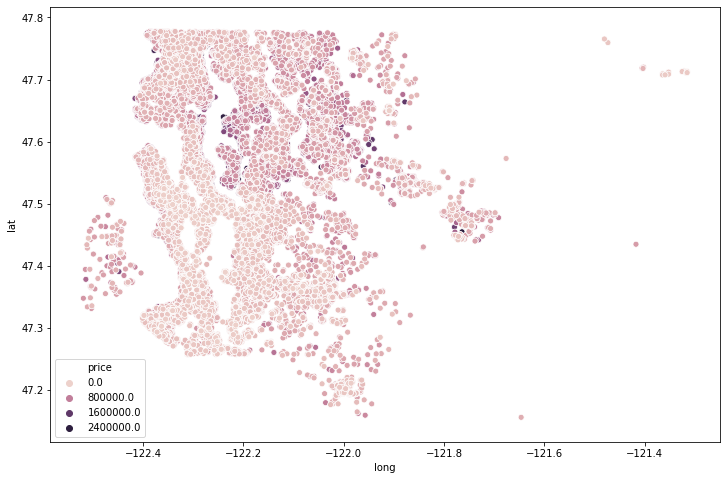

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price')

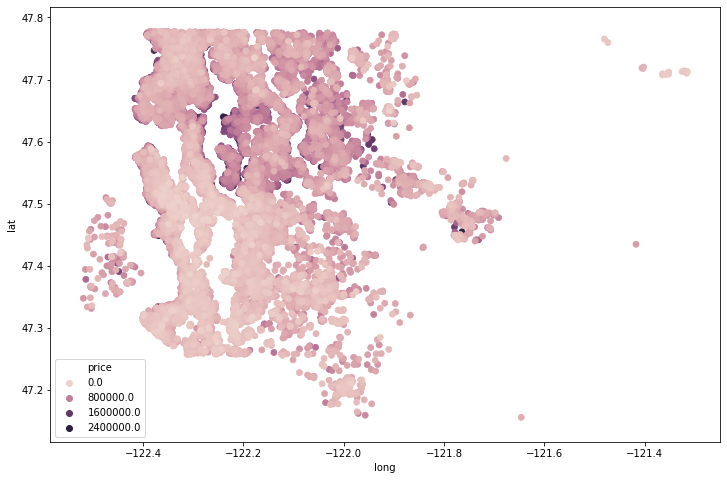

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                edgecolor=None)

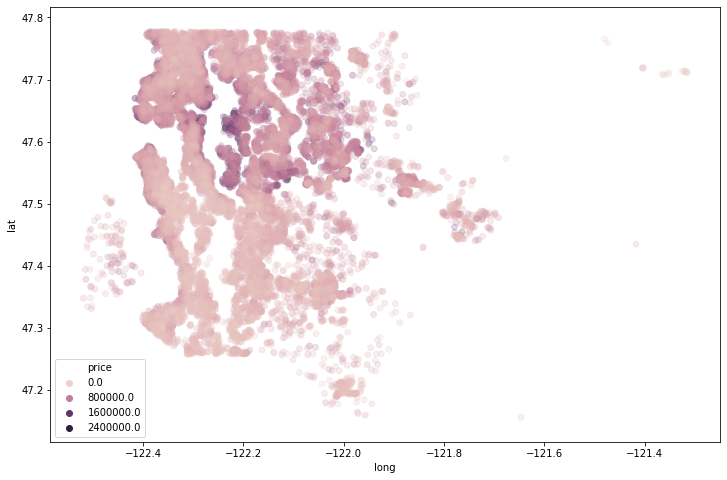

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                edgecolor=None,alpha=0.2)

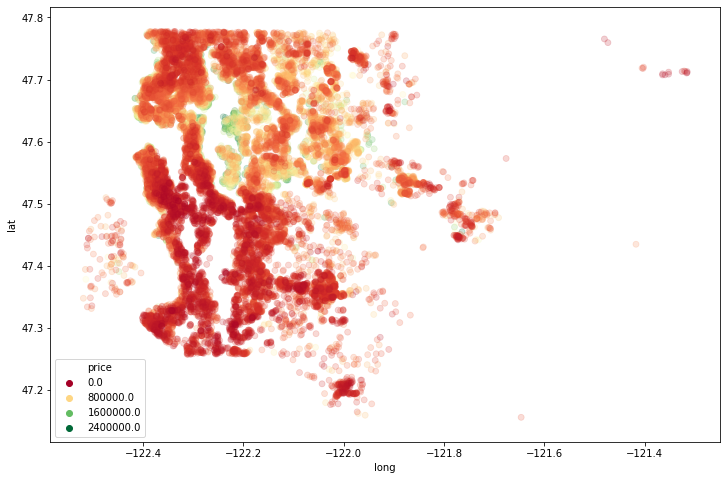

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Other Features

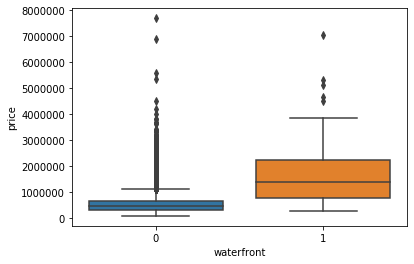

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [17]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [117]:
df = df.drop('id',axis=1)

In [118]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

### Feature Engineering from Date

In [119]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

The date column is a regular string. Let us convert it to a date object.

In [120]:
df['date'] = pd.to_datetime(df['date'])

Let us look at the 'date' column again. We see that its type changed.

In [121]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

Now that 'date' is a datetime object, we can introduce the additional features 'month' and 'year'. Let us do so.

In [122]:
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)

In [60]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0           0     0  ...              0      1955   
1      7242     2.0           0     0  ...            400      1951   
2     10000     1.0           0     0  ...              0      1933   
3      5000     1.0           0     0  ...            910      1965   
4      8080     1.0           0     0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  month  \
0             0    98178  47.5112 -122.257           1340        5650     10   
1          1991    98125  47.7210 -122.319           1690        7639     12   
2             0    98028  47.7379 -122.233           2720        8062      2   
3             0    98136  47.5208 -122.393           1360        5000     12   
4             0    98074  47.6168 -122.045           1800        7503      2   

   year  
0  2014  
1  2014  
2  2015  
3  2014  
4  2015  

[5 rows x 23 columns]

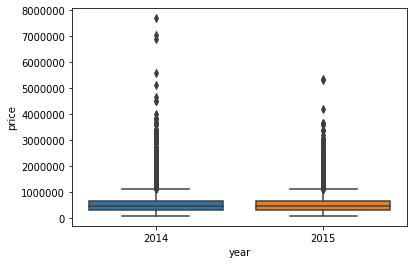

In [24]:
sns.boxplot(x='year',y='price',data=df)

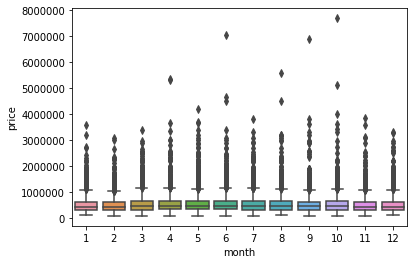

In [25]:
sns.boxplot(x='month',y='price',data=df)

In [73]:
df.groupby('month').mean()

id          price  bedrooms  bathrooms  sqft_living  \
month                                                                  
1      4.574031e+09  525963.251534  3.387526   2.129346  2085.094070   
2      4.599148e+09  508520.051323  3.347233   2.062550  2012.901363   
3      4.600587e+09  544057.683200  3.367467   2.065333  2021.968533   
4      4.692244e+09  562215.615074  3.367878   2.107896  2060.743831   
5      4.608945e+09  550849.746893  3.363712   2.116508  2090.514913   
6      4.573204e+09  557534.318182  3.421488   2.165863  2131.163912   
7      4.578350e+09  544892.161013  3.391678   2.146540  2128.246495   
8      4.618561e+09  536655.212481  3.357401   2.123388  2085.100567   
9      4.462029e+09  529723.517787  3.365330   2.133117  2079.319593   
10     4.525600e+09  539439.447228  3.364072   2.120203  2085.705224   
11     4.524100e+09  522359.903478  3.337828   2.080554  2049.625976   
12     4.557526e+09  524799.902041  3.393197   2.104422  2091.761905   

           sqft_lot    floors  waterfront      view  condition  ...  \
month                                                           ...   
1      17869.721881  1.478528    0.008180  0.246421   3.347648  ...   
2      13694.825180  1.466319    0.004812  0.242181   3.405774  ...   
3      15604.088533  1.464267    0.006933  0.238933   3.355733  ...   
4      14273.263795  1.495065    0.008524  0.230597   3.358905  ...   
5      16678.293289  1.486123    0.005385  0.239022   3.420464  ...   
6      14258.142792  1.512167    0.008724  0.241047   3.460514  ...   
7      13857.654907  1.522162    0.006784  0.221167   3.442786  ...   
8      14643.078391  1.499484    0.006189  0.223311   3.440433  ...   
9      15365.775833  1.491248    0.008470  0.249012   3.431959  ...   
10     15389.313433  1.503465    0.008529  0.244670   3.412047  ...   
11     15257.222143  1.500710    0.010646  0.221434   3.403123  ...   
12     15337.904082  1.486735    0.008163  0.217007   3.395238  ...   

        sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
month                                                                        
1      1814.019427     271.074642  1971.749489     73.433538  98077.897751   
2      1727.935846     284.965517  1971.418605     51.178027  98076.716119   
3      1740.604800     281.363733  1970.597333     82.976533  98077.578667   
4      1777.883804     282.860027  1971.731270     70.733961  98078.967250   
5      1780.695940     309.818973  1970.216653    105.121375  98079.094863   
6      1820.423324     310.740588  1970.723600     80.617080  98079.596419   
7      1841.531886     286.714609  1971.777024     92.125283  98074.758933   
8      1798.394533     286.706034  1972.044353     78.234141  98077.033522   
9      1786.968379     292.351214  1970.534161     99.215697  98078.513834   
10     1788.792111     296.913113  1970.111407     94.574094  98078.598081   
11     1776.386089     273.239886  1970.094393     87.698368  98078.589780   
12     1787.294558     304.467347  1971.259184     77.463265  98077.559184   

             lat        long  sqft_living15    sqft_lot15         year  
month                                                                   
1      47.553500 -122.212188    1975.859918  12687.026585  2015.000000  
2      47.546850 -122.216140    1944.269447  11595.312751  2015.000000  
3      47.553377 -122.214041    1951.490133  12678.426133  2015.000000  
4      47.560614 -122.213484    1986.577389  12653.579632  2015.000000  
5      47.565075 -122.214854    1990.449876  13694.719553  2014.267606  
6      47.565513 -122.214423    2033.827824  12835.893939  2014.000000  
7      47.560198 -122.206664    2029.130710  12584.116689  2014.000000  
8      47.564750 -122.209769    1995.968025  12966.646209  2014.000000  
9      47.560654 -122.213067    1983.068888  11887.396951  2014.000000  
10     47.562249 -122.217264    1981.493070  12880.621002  2014.000000  
11     47.557950 -122.218528    1940.954578 

In [72]:
df.groupby('month')['price'].describe()

count           mean            std       min       25%       50%  \
month                                                                       
1       978.0  525963.251534  366325.078718   99000.0  310162.5  438500.0   
2      1247.0  508520.051323  326338.143596   89950.0  309000.0  426500.0   
3      1875.0  544057.683200  355261.128306   81000.0  319925.0  450000.0   
4      2229.0  562215.615074  370185.322477   84000.0  338900.0  477000.0   
5      2414.0  550849.746893  373123.107895   78000.0  330000.0  462000.0   
6      2178.0  557534.318182  388214.092347   92000.0  330000.0  465000.0   
7      2211.0  544892.161013  346984.162150   86500.0  325000.0  465000.0   
8      1939.0  536655.212481  370833.668388  107000.0  324848.5  442200.0   
9      1771.0  529723.517787  372878.789713   85000.0  325000.0  450000.0   
10     1876.0  539439.447228  399559.604134   89000.0  315000.0  447000.0   
11     1409.0  522359.903478  356118.986556   82000.0  308625.0  435000.0   
12     1470.0  524799.902041  353687.708316   95000.0  312500.0  432500.0   

            75%        max  
month                       
1      625000.0  3570000.0  
2      600000.0  3070000.0  
3      655000.0  3400000.0  
4      669000.0  5350000.0  
5      646625.0  4210000.0  
6      665000.0  7060000.0  
7      653875.0  3800000.0  
8      640000.0  5570000.0  
9      624750.0  6890000.0  
10     640000.0  7700000.0  
11     616000.0  3850000.0  
12     626775.0  3300000.0

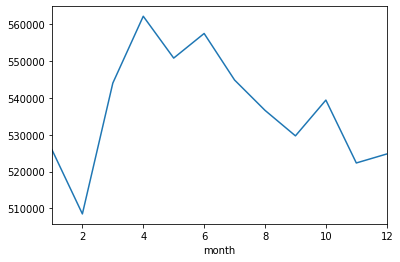

In [26]:
df.groupby('month').mean()['price'].plot()

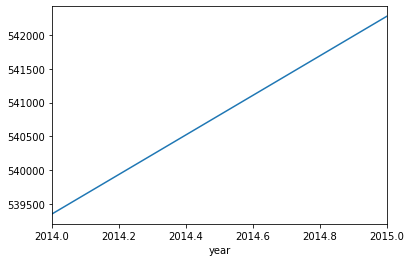

In [27]:
df.groupby('year').mean()['price'].plot()

We won't be needing the original 'date' column any longer. Let us remove it.

In [124]:
df = df.drop('date',axis=1)

In [125]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

Let us look at the other columns. Note the column 'zipcode', which is currently an integer, i.e., a continuous variable rather than a categorical one. It makes no sense to treat it as a continuous variable, so either we transform it into a categorical one, or we remove the feature altogether. 

In [74]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

Let us check how easily we can transform 'zipcode' into a categorical variable. How many different zipcodes do we have in the dataset? Turns out we have 70, which is too many to be useful. We could try to group them in a certain way, but that would require additional domain knowledge to figure out how to make a useful grouping in this area. Let's just drop the column for now.

In [75]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [126]:
df = df.drop('zipcode',axis=1)

In [127]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  month  year  
0  47.5112 -122.257           1340        5650     10  2014  
1  47.7210 -122.319           1690        7639     12  2014  
2  47.7379 -122.233           2720        8062      2  2015  
3  47.5208 -122.393           1360        5000     12  2014  
4  47.6168 -122.045           1800        7503      2  2015

Let us look at some other columns which may be of the categorical type. The column 'yr_renovated' is one of those. Do we keep it as a continuous variable, or do we turn it into a categorical one? As non-renovated implies a zero as value for yr_renovated, we can keep it as a continuous variable.

In [33]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

The same argument applies for the column 'sqft_basement'. Having no basement implies a 0 in this column. Hence, we can keep this as a continuous variable.

In [34]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

First we separate the features from the labels.

In [128]:
X = df.drop('price',axis=1)
y = df['price']

In [129]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
year             21597 non-null int64
dtypes: float64(4), int64(15)
memory usage: 3.1 MB


Avoid issues between pandas datatypes & numpy numerics. Calling 'values' returns the numpy array underneath the pandas dataframe.

In [105]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
month            21597 non-null int64
year             21597 non-null int64
dtypes: float64(4), int64(15)
memory usage: 3.1 MB


Split the data into a training set and a test set.

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

Now we do the scaling. Note that we do the scaling post-split. This way we only fit to the training set, to prevent date leakage from the test set. 

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

Redefine the training set as the scaled version.

In [136]:
X_train= scaler.fit_transform(X_train)

Only transform the test set, not fit it. We don't fit to our test test, as we don't want to assume prior information about our test set.

In [137]:
X_test = scaler.transform(X_test)

In [138]:
X_train.shape

(15117, 19)

In [139]:
X_test.shape

(6480, 19)

## Creating a Model

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Base the number of neurons on the size of the feature data.

In [141]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))# output of predicted price

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [142]:
model.fit(x=X_train,y=y_train.values,# .values because TensorFlow does not work well with pandas dataframes
          validation_data=(X_test,y_test.values), # Check regularly how well the model is doing on the validation date
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 3s 225us/sample - loss: 430238635612.6999 - val_loss: 418915498697.0074
Epoch 2/400
15117/15117 [==============================] - 2s 153us/sample - loss: 429230261264.4604 - val_loss: 415378709132.3259
Epoch 3/400
15117/15117 [==============================] - 2s 146us/sample - loss: 414663968911.4697 - val_loss: 381468880177.9358
Epoch 4/400
15117/15117 [==============================] - 2s 143us/sample - loss: 338889526528.3895 - val_loss: 255531678085.3728
Epoch 5/400
15117/15117 [==============================] - 2s 142us/sample - loss: 182427143736.5276 - val_loss: 112348126534.1630
Epoch 6/400
15117/15117 [==============================] - 2s 141us/sample - loss: 103094140754.5899 - val_loss: 95008560762.6272
Epoch 7/400
15117/15117 [==============================] - 2s 152us/sample - loss: 97400999408.4541 - val_loss: 93335449529.2049
Epoch 8/400
15117/15117 [============

Epoch 126/400
15117/15117 [==============================] - 2s 146us/sample - loss: 32993206258.4523 - val_loss: 31545713312.5531
Epoch 127/400
15117/15117 [==============================] - 2s 153us/sample - loss: 32960235402.2708 - val_loss: 31536631282.0938
Epoch 128/400
15117/15117 [==============================] - 2s 149us/sample - loss: 32906608657.8829 - val_loss: 31563589475.2395
Epoch 129/400
15117/15117 [==============================] - 2s 150us/sample - loss: 32901670258.5963 - val_loss: 31423385979.2593
Epoch 130/400
15117/15117 [==============================] - 2s 153us/sample - loss: 32859626250.5841 - val_loss: 31385156332.4049
Epoch 131/400
15117/15117 [==============================] - 2s 145us/sample - loss: 32799426853.5778 - val_loss: 31369326561.6593
Epoch 132/400
15117/15117 [==============================] - 2s 154us/sample - loss: 32819423467.5938 - val_loss: 31302325821.9457
Epoch 133/400
15117/15117 [==============================] - 2s 143us/sample - loss

15117/15117 [==============================] - 0s 20us/sample - loss: 30723369262.7902 - val_loss: 28650965305.5210
Epoch 252/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30692161060.0029 - val_loss: 28672190125.1951
Epoch 253/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30703258485.6106 - val_loss: 28648235463.1111
Epoch 254/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30637077615.7682 - val_loss: 28624668818.6469
Epoch 255/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30667016723.9151 - val_loss: 28670011341.4321
Epoch 256/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30649720250.7376 - val_loss: 28615191428.1086
Epoch 257/400
15117/15117 [==============================] - 0s 22us/sample - loss: 30662645362.3761 - val_loss: 28565706312.0593
Epoch 258/400
15117/15117 [==============================] - 0s 23us/sample - loss: 30689751693.9456 - v

15117/15117 [==============================] - 0s 20us/sample - loss: 29680020039.2268 - val_loss: 27339257684.0691
Epoch 378/400
15117/15117 [==============================] - 0s 23us/sample - loss: 29694643467.4732 - val_loss: 27280976266.4296
Epoch 379/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29637246822.3695 - val_loss: 27406410344.9284
Epoch 380/400
15117/15117 [==============================] - 0s 23us/sample - loss: 29616771920.7271 - val_loss: 27319154384.5926
Epoch 381/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29652239302.9305 - val_loss: 27263721118.0247
Epoch 382/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29665934392.9679 - val_loss: 27296444815.4864
Epoch 383/400
15117/15117 [==============================] - 0s 22us/sample - loss: 29610866866.9646 - val_loss: 27299471102.1037
Epoch 384/400
15117/15117 [==============================] - 0s 23us/sample - loss: 29624743064.9531 - v

In [145]:
losses = pd.DataFrame(model.history.history)

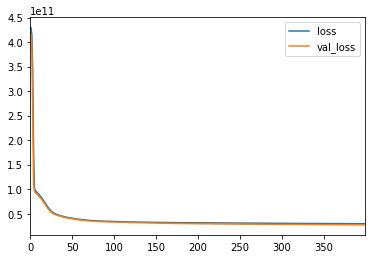

In [146]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [147]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [148]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [149]:
predictions = model.predict(X_test)

In [150]:
mean_absolute_error(y_test,predictions)

101428.33894796489

In [151]:
np.sqrt(mean_squared_error(y_test,predictions))

164702.31196202312

In [54]:
explained_variance_score(y_test,predictions)

0.8009472831860807

In [55]:
df['price'].mean()

540296.5735055795

In [56]:
df['price'].median()

450000.0

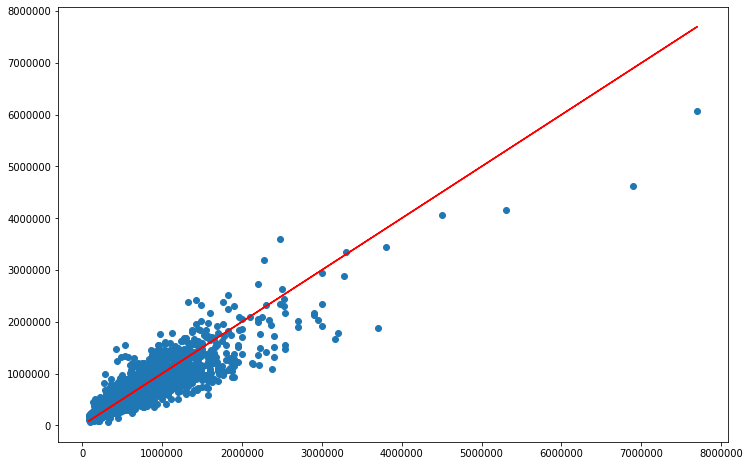

In [152]:
plt.figure(figsize=(12,8))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

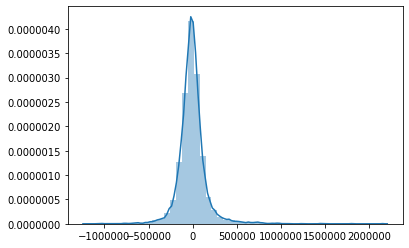

In [59]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [81]:
single_house = df.drop('price',axis=1).iloc[0]

In [86]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [87]:
single_house

array([[0.22222222, 0.08      , 0.11392405, 0.00433777, 0.        ,
        0.        , 0.        , 0.5       , 0.375     , 0.11654676,
        0.        , 0.47826087, 0.        , 0.56914119, 0.21760797,
        0.16510319, 0.00574235, 0.81818182, 0.        ]])

In [89]:
model.predict(single_house)

array([[283862.12]], dtype=float32)

In [90]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

# Retry with outliers removed

Next we test the impact of the outliers on the model's performance. Let us strip off the 1% most expensive houses.

Read source data & do some basic transformation on the features

In [23]:
# Read the source data file
df = pd.read_csv('data/kc_house_data.csv')
# Remove the 1% most expensive houses
df = df.sort_values('price',ascending=False).iloc[216:]
# Transform date from string to a datetime object
df['date'] = pd.to_datetime(df['date'])
# Create month and year features
df['month'] = df['date'].apply(lambda date: date.month)
df['year'] = df['date'].apply(lambda date: date.year)
# Drop features we won't be using
df = df.drop('id',axis=1)
df = df.drop('zipcode',axis=1)
df = df.drop('date',axis=1)

Scale & split between training/validation data

In [26]:
# Separate labels and features
X = df.drop('price',axis=1)
y = df['price']
# Split source data in test & training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create model & train

Train on 14966 samples, validate on 6415 samples
Epoch 1/400
14966/14966 [==============================] - 2s 161us/sample - loss: 346866210086.6241 - val_loss: 356819519608.3579
Epoch 2/400
14966/14966 [==============================] - 2s 103us/sample - loss: 345689991109.1573 - val_loss: 352789987759.6284
Epoch 3/400
14966/14966 [==============================] - 2s 108us/sample - loss: 329954033694.6530 - val_loss: 315629525728.5138
Epoch 4/400
14966/14966 [==============================] - 1s 93us/sample - loss: 253027778573.1370 - val_loss: 189111916392.9939
Epoch 5/400
14966/14966 [==============================] - 2s 102us/sample - loss: 113607681264.9814 - val_loss: 66884774265.6748
Epoch 6/400
14966/14966 [==============================] - 2s 108us/sample - loss: 56479828114.4226 - val_loss: 55174749779.5641
Epoch 7/400
14966/14966 [==============================] - 2s 116us/sample - loss: 53753934691.5879 - val_loss: 54248189939.2299
Epoch 8/400
14966/14966 [===============

14966/14966 [==============================] - 0s 18us/sample - loss: 23090070002.3841 - val_loss: 24007251530.7847
Epoch 65/400
14966/14966 [==============================] - 0s 18us/sample - loss: 23051369220.8922 - val_loss: 23905285574.4549
Epoch 66/400
14966/14966 [==============================] - 0s 20us/sample - loss: 22997207702.0489 - val_loss: 23921746167.4201
Epoch 67/400
14966/14966 [==============================] - 0s 17us/sample - loss: 22962060478.3493 - val_loss: 23848194664.6348
Epoch 68/400
14966/14966 [==============================] - 0s 17us/sample - loss: 22902632255.3243 - val_loss: 23784493819.9694
Epoch 69/400
14966/14966 [==============================] - 0s 17us/sample - loss: 22868279892.3640 - val_loss: 23740688803.8161
Epoch 70/400
14966/14966 [==============================] - 0s 19us/sample - loss: 22824372746.4685 - val_loss: 23717992687.2792
Epoch 71/400
14966/14966 [==============================] - 1s 57us/sample - loss: 22779924799.9401 - val_loss

14966/14966 [==============================] - 0s 20us/sample - loss: 20864145782.4038 - val_loss: 21813553535.1021
Epoch 191/400
14966/14966 [==============================] - 0s 32us/sample - loss: 20856065853.6822 - val_loss: 21820118402.1350
Epoch 192/400
14966/14966 [==============================] - 0s 32us/sample - loss: 20876118294.0660 - val_loss: 21798233926.5147
Epoch 193/400
14966/14966 [==============================] - 0s 20us/sample - loss: 20839842929.7170 - val_loss: 21809327077.0232
Epoch 194/400
14966/14966 [==============================] - 0s 26us/sample - loss: 20865136938.0452 - val_loss: 21894806412.5905
Epoch 195/400
14966/14966 [==============================] - 0s 25us/sample - loss: 20833166229.3989 - val_loss: 21801421175.1208
Epoch 196/400
14966/14966 [==============================] - 0s 17us/sample - loss: 20852467394.9336 - val_loss: 21800385158.4848
Epoch 197/400
14966/14966 [==============================] - 0s 16us/sample - loss: 20847682990.0992 - v

Epoch 316/400
14966/14966 [==============================] - 2s 111us/sample - loss: 20560000765.0921 - val_loss: 21426766647.9888
Epoch 317/400
14966/14966 [==============================] - 2s 107us/sample - loss: 20550157946.5434 - val_loss: 21423181579.1339
Epoch 318/400
14966/14966 [==============================] - 1s 94us/sample - loss: 20544548392.0267 - val_loss: 21415994383.1645
Epoch 319/400
14966/14966 [==============================] - 1s 56us/sample - loss: 20556162821.8501 - val_loss: 21420269228.3161
Epoch 320/400
14966/14966 [==============================] - 0s 29us/sample - loss: 20548601209.0039 - val_loss: 21435551494.9836
Epoch 321/400
14966/14966 [==============================] - 0s 33us/sample - loss: 20534774057.7715 - val_loss: 21410910958.8801
Epoch 322/400
14966/14966 [==============================] - 0s 32us/sample - loss: 20533705224.8264 - val_loss: 21437222133.9835
Epoch 323/400
14966/14966 [==============================] - 0s 32us/sample - loss: 2053

Epoch 379/400
14966/14966 [==============================] - 0s 10us/sample - loss: 20364673794.4290 - val_loss: 21216078853.2677
Epoch 380/400
14966/14966 [==============================] - 0s 13us/sample - loss: 20358499898.7743 - val_loss: 21208938691.7013
Epoch 381/400
14966/14966 [==============================] - 0s 11us/sample - loss: 20371983985.5117 - val_loss: 21215609659.8198
Epoch 382/400
14966/14966 [==============================] - 0s 10us/sample - loss: 20387069112.6019 - val_loss: 21207106474.6002
Epoch 383/400
14966/14966 [==============================] - 0s 10us/sample - loss: 20355499037.0108 - val_loss: 21210420878.6257
Epoch 384/400
14966/14966 [==============================] - 0s 12us/sample - loss: 20342443803.7450 - val_loss: 21206997324.3411
Epoch 385/400
14966/14966 [==============================] - 0s 10us/sample - loss: 20356852707.9471 - val_loss: 21222329543.0535
Epoch 386/400
14966/14966 [==============================] - 0s 10us/sample - loss: 203447

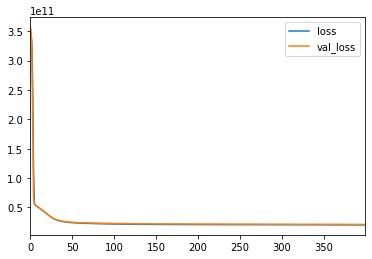

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Create the model
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))# output of predicted price
model.compile(optimizer='adam',loss='mse')

# Train the model
model.fit(x=X_train,y=y_train.values,# .values because TensorFlow does not work well with pandas dataframes
          validation_data=(X_test,y_test.values), # Check regularly how well the model is doing on the validation date
          batch_size=128,epochs=400)

# Plot the losses
losses = pd.DataFrame(model.history.history)
losses.plot()

Evaluate the model

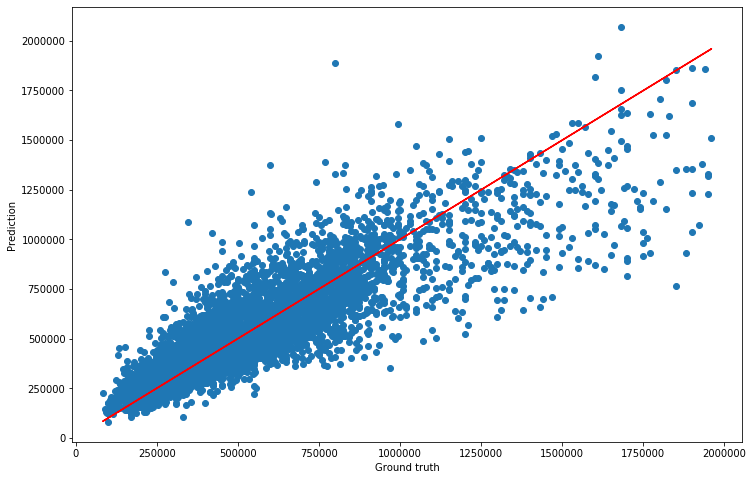

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
# Predict on test data
predictions = model.predict(X_test)
# Plot predictions
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('Ground truth')
plt.ylabel('Prediction')
plt.plot(y_test,y_test,'r')

In [31]:
mean_absolute_error(y_test,predictions)

97565.36841509158

In [34]:
df['price'].mean()

518367.48037977645

In [35]:
df['price'].median()

450000.0